In [2]:
import pandas as pd

# Load dataset
df = pd.read_csv("/content/Credit card transactions - India - Simple.csv")
df.head()

,index,City,Date,Card Type,Exp Type,Gender,Amount
0,0,"Delhi, India",29-Oct-14,Gold,Bills,F,82475
1,1,"Greater Mumbai, India",22-Aug-14,Platinum,Bills,F,32555
2,2,"Bengaluru, India",27-Aug-14,Silver,Bills,F,101738
3,3,"Greater Mumbai, India",12-Apr-14,Signature,Bills,F,123424
4,4,"Bengaluru, India",5-May-15,Gold,Bills,F,171574


In [4]:
# 1. Drop the 'index' column (not useful for analysis)
df.drop(columns=['index'], inplace=True)

# 2. Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%y')

# 3. Create new time-related features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Weekday'] = df['Date'].dt.day_name()

# 4. Confirm changes
df.head()

,City,Date,Card Type,Exp Type,Gender,Amount,Year,Month,Day,Weekday
0,"Delhi, India",2014-10-29,Gold,Bills,F,82475,2014,10,29,Wednesday
1,"Greater Mumbai, India",2014-08-22,Platinum,Bills,F,32555,2014,8,22,Friday
2,"Bengaluru, India",2014-08-27,Silver,Bills,F,101738,2014,8,27,Wednesday
3,"Greater Mumbai, India",2014-04-12,Signature,Bills,F,123424,2014,4,12,Saturday
4,"Bengaluru, India",2015-05-05,Gold,Bills,F,171574,2015,5,5,Tuesday


In [5]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')


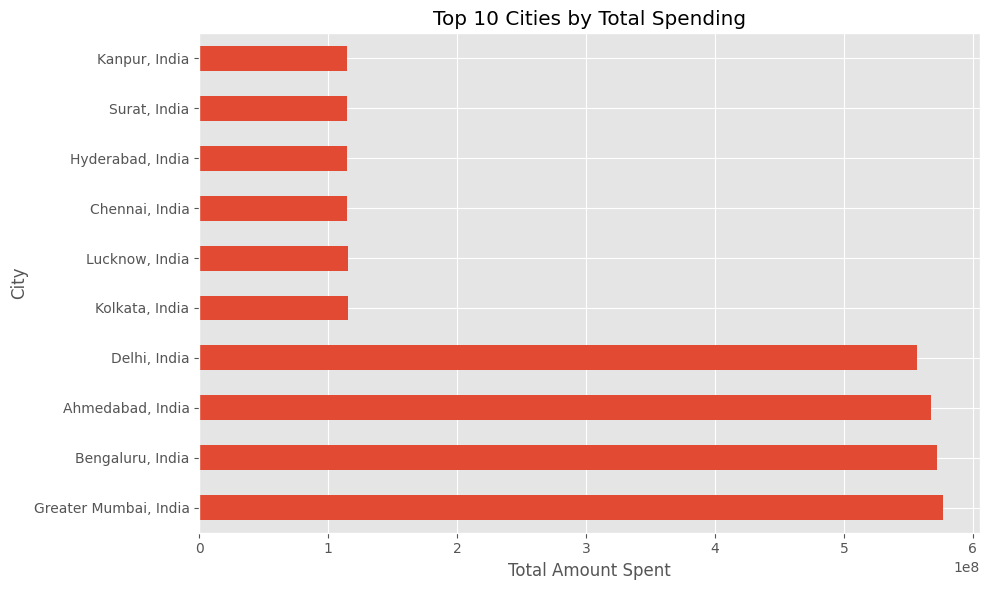

In [6]:
top_cities = df.groupby('City')['Amount'].sum().sort_values(ascending=False).head(10)

top_cities.plot(kind='barh', figsize=(10,6), title='Top 10 Cities by Total Spending')
plt.xlabel("Total Amount Spent")
plt.ylabel("City")
plt.tight_layout()
plt.show()


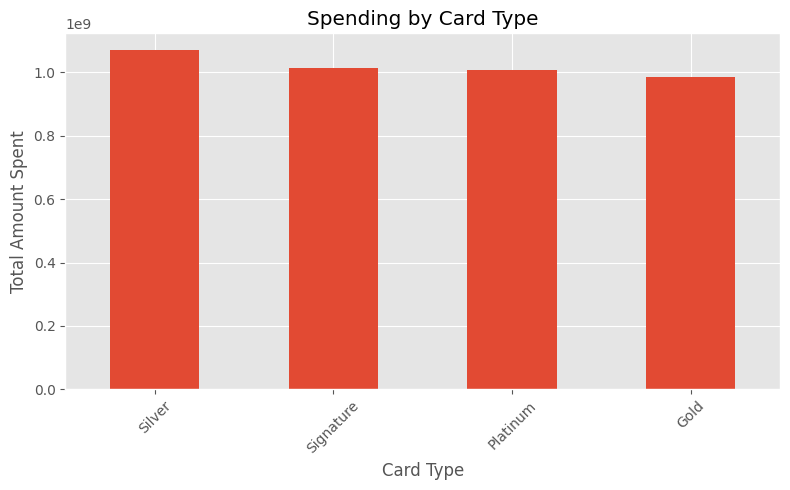

In [7]:
card_spending = df.groupby('Card Type')['Amount'].sum().sort_values(ascending=False)

card_spending.plot(kind='bar', figsize=(8,5), title='Spending by Card Type')
plt.ylabel("Total Amount Spent")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


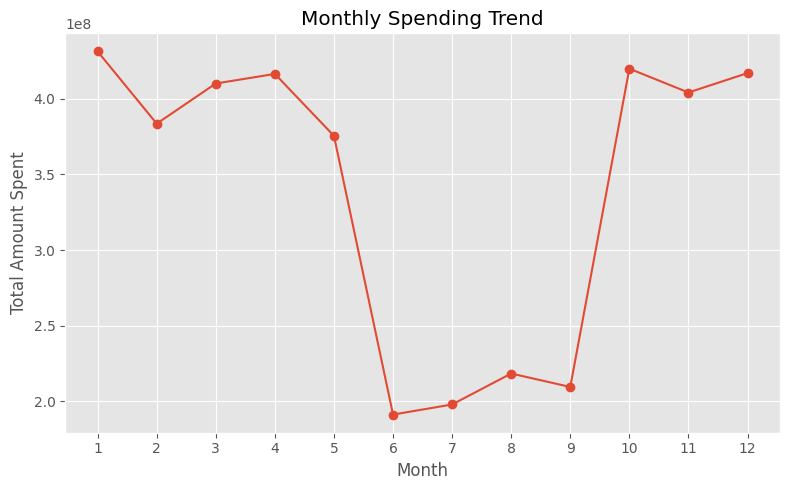

In [8]:
monthly_trend = df.groupby('Month')['Amount'].sum()

monthly_trend.plot(kind='line', marker='o', figsize=(8,5), title='Monthly Spending Trend')
plt.ylabel("Total Amount Spent")
plt.xlabel("Month")
plt.xticks(range(1, 13))
plt.tight_layout()
plt.show()


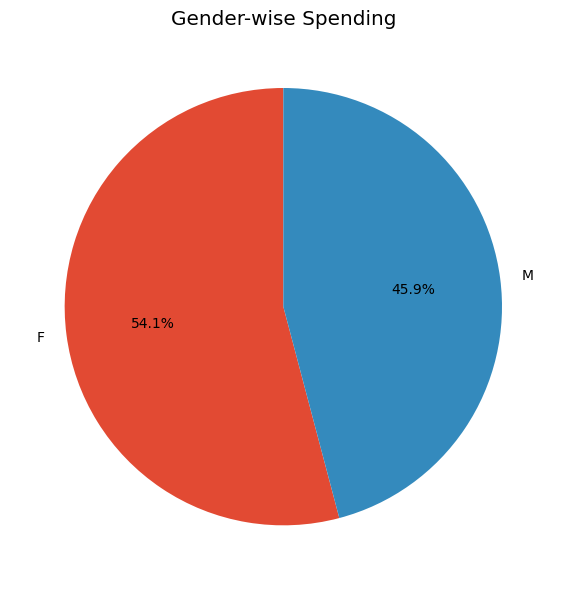

In [9]:
gender_spending = df.groupby('Gender')['Amount'].sum()

gender_spending.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    title='Gender-wise Spending',
    figsize=(6,6)
)
plt.ylabel("")  # Hides y-label
plt.tight_layout()
plt.show()


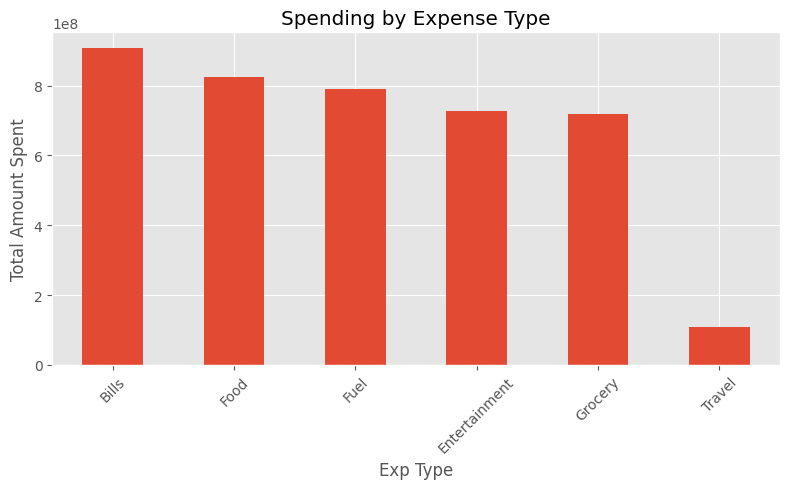

In [10]:
exp_type_spending = df.groupby('Exp Type')['Amount'].sum().sort_values(ascending=False)

exp_type_spending.plot(kind='bar', figsize=(8,5), title='Spending by Expense Type')
plt.ylabel("Total Amount Spent")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [11]:
df.to_csv('cleaned_expense_data.csv', index=False)


In [12]:
import sqlite3

# Connect to an in-memory SQLite database
conn = sqlite3.connect(':memory:')

# Load pandas DataFrame into SQL
df.to_sql('transactions', conn, index=False, if_exists='replace')


26052

In [13]:
query = """
SELECT Gender, SUM(Amount) AS Total_Spending
FROM transactions
GROUP BY Gender
ORDER BY Total_Spending DESC
"""
pd.read_sql_query(query, conn)


,Gender,Total_Spending
0,F,2205311030
1,M,1869522343


In [14]:
query = """
SELECT City, SUM(Amount) AS Total_Spending
FROM transactions
GROUP BY City
ORDER BY Total_Spending DESC
LIMIT 5
"""
pd.read_sql_query(query, conn)


,City,Total_Spending
0,"Greater Mumbai, India",576751476
1,"Bengaluru, India",572326739
2,"Ahmedabad, India",567794310
3,"Delhi, India",556929212
4,"Kolkata, India",115466943


In [22]:
query = """
SELECT Year, Month, Day, SUM(Amount) AS Monthly_Spending
FROM transactions
GROUP BY Year, Month
ORDER BY Date
"""
pd.read_sql_query(query, conn)


,Year,Month,Day,Monthly_Spending
0,2013,10,11,207360092
1,2013,11,9,192015963
2,2013,12,7,214267829
3,2014,1,1,207650982
4,2014,2,4,189220180
5,2014,3,28,203233307
6,2014,4,12,208284732
7,2014,5,17,201762312
8,2014,6,26,191321039
9,2014,7,1,197981416


In [16]:
query = """
SELECT [Card Type], ROUND(AVG(Amount), 2) AS Avg_Amount
FROM transactions
GROUP BY [Card Type]
ORDER BY Avg_Amount DESC
"""
pd.read_sql_query(query, conn)


,Card Type,Avg_Amount
0,Platinum,157492.81
1,Signature,157133.72
2,Silver,156376.27
3,Gold,154631.62


In [17]:
query = """
SELECT Gender, [Exp Type], COUNT(*) AS Count
FROM transactions
GROUP BY Gender, [Exp Type]
ORDER BY Gender, Count DESC
"""
pd.read_sql_query(query, conn)


,Gender,Exp Type,Count
0,F,Food,3012
1,F,Bills,2860
2,F,Fuel,2617
3,F,Grocery,2428
4,F,Entertainment,2384
5,F,Travel,379
6,M,Fuel,2640
7,M,Food,2451
8,M,Entertainment,2378
9,M,Grocery,2326


In [18]:
query = """
SELECT Weekday, SUM(Amount) AS Total_Spending
FROM transactions
GROUP BY Weekday
ORDER BY Total_Spending DESC
"""
pd.read_sql_query(query, conn)


,Weekday,Total_Spending
0,Sunday,596345367
1,Tuesday,588289572
2,Saturday,588112970
3,Friday,582828807
4,Thursday,574399018
5,Monday,573626475
6,Wednesday,571231164


In [23]:
df['Gender'].value_counts(dropna=False)


,count
Gender,
F,13680
M,12372


In [24]:
# Optional: Standardize values
df['Gender'] = df['Gender'].replace({'F': 'Female', 'M': 'Male'})

# Fill missing with 'Unknown' (optional)
df['Gender'] = df['Gender'].fillna('Unknown')


In [25]:
df.to_csv('cleaned_expense_data.csv', index=False)

from google.colab import files
files.download('cleaned_expense_data.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>